In [1]:
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt

load_dotenv()
file = os.getenv('FILEPATH')

## DESCRIBING DATASET

#### Columns and their datatypes 


In [2]:
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3559743 entries, 0 to 3559742
Data columns (total 27 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   clan_tag                        object
 1   clan_name                       object
 2   clan_type                       object
 3   clan_description                object
 4   clan_location                   object
 5   isFamilyFriendly                bool  
 6   clan_badge_url                  object
 7   clan_level                      int64 
 8   clan_points                     int64 
 9   clan_builder_base_points        int64 
 10  clan_versus_points              int64 
 11  required_trophies               int64 
 12  war_frequency                   object
 13  war_win_streak                  int64 
 14  war_wins                        int64 
 15  war_ties                        int64 
 16  war_losses                      int64 
 17  clan_war_league                 object
 18  nu

#### Dimensions of the dataframe

In [3]:
df.shape

(3559743, 27)

#### Columns with missing values and their details

In [4]:
for col in df.columns:
    if df[col].isnull().any():
        print(col)

clan_name
clan_description
clan_location


In [5]:
clan_name_missing_values = df['clan_name'].isnull().sum()
clan_description_missing_values = df['clan_description'].isnull().sum()
clan_location_missing_values = df['clan_location'].isnull().sum()
total_values = df.shape[0]

print(f'Missing values in clan_name column is = {clan_name_missing_values} \n'
      f'Missing values in clan_description column is = {clan_description_missing_values} \n'
      f'Missing values in clan_location column is = {clan_location_missing_values} \n'
      f'Total Values in each column of the dataframe is = {total_values}')



Missing values in clan_name column is = 62 
Missing values in clan_description column is = 1351365 
Missing values in clan_location column is = 1451672 
Total Values in each column of the dataframe is = 3559743


#### Plotting the charts on the basis of missing values from each columns

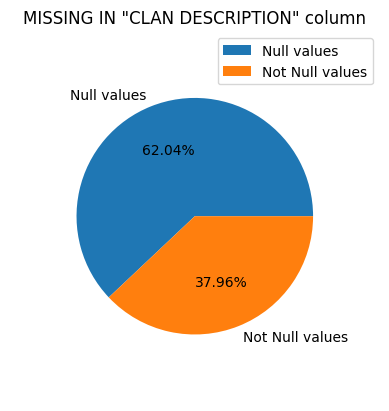

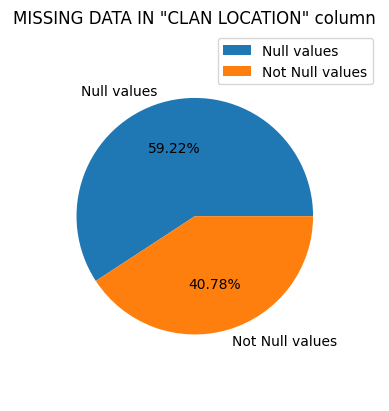

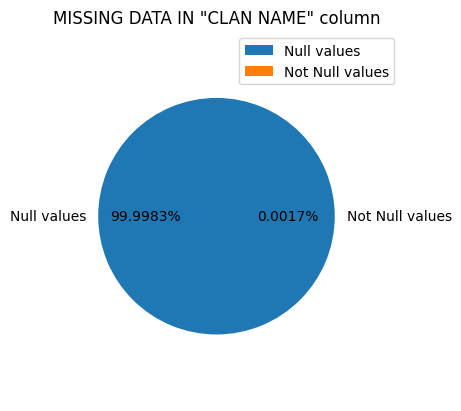

In [6]:
class missing_values():
    clan_description_notNull_values = total_values - clan_description_missing_values
    clan_location_notNull_values = total_values - clan_location_missing_values
    clan_name_notNull_values = total_values - clan_name_missing_values
    labels = ['Null values', 'Not Null values']

    def clan_description_plot():
        portions = [missing_values.clan_description_notNull_values, clan_description_missing_values]
        plt.pie(portions, labels=missing_values.labels,  radius=0.8, autopct='%.2f%%')
        plt.legend()
        plt.title('MISSING IN "CLAN DESCRIPTION" column')
        return plt.show()
    
    def clan_location_plot():
        portions = [missing_values.clan_location_notNull_values, clan_location_missing_values]
        plt.pie(portions, labels=missing_values.labels,  radius=0.8, autopct='%.2f%%')
        plt.legend()
        plt.title('MISSING DATA IN "CLAN LOCATION" column')
        return plt.show()
    
    
    def clan_name_plot():
        portions = [missing_values.clan_name_notNull_values, clan_name_missing_values]
        plt.pie(portions, labels=missing_values.labels,  radius=0.8, autopct='%.4f%%')
        plt.legend()
        plt.title('MISSING DATA IN "CLAN NAME" column')
        return plt.show()
    

missing_values.clan_description_plot()
missing_values.clan_location_plot()
missing_values.clan_name_plot()

## VISUALIZING DATASET

#### PLOTTING BARS TO SEE THE NUMBER OF CLANS THAT ARE FAMILY FRIENDLY 

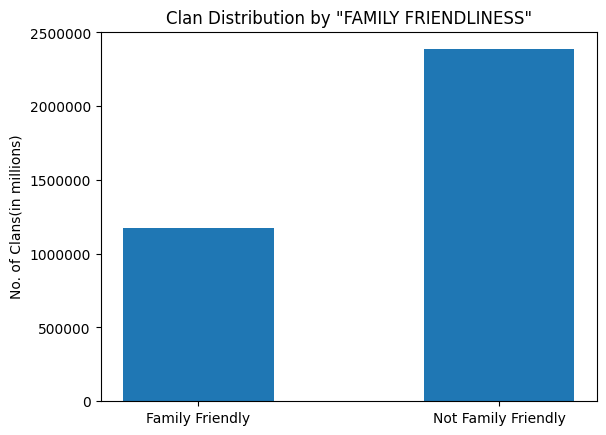

In [7]:
def isFamilyFriendly():
        isFamilyFriendly_True = df.where(df['isFamilyFriendly'] == True).count()['clan_tag']
        isFamilyFriendly_False = df.where(df['isFamilyFriendly'] == False).count()['clan_tag']
        labels = ['Family Friendly', 'Not Family Friendly']
        height = [isFamilyFriendly_True, isFamilyFriendly_False]

        fig, ax = plt.subplots()
        ax.bar(labels, height=height, width=0.5)
        ax.set_title('Clan Distribution by "FAMILY FRIENDLINESS"')
        ax.set_ylabel('No. of Clans(in millions)')
        ax.get_yaxis().get_major_formatter().set_scientific(False)
        return plt.show()
    
isFamilyFriendly()
        

#### LOOKING FOR TYPES OF CLAN_TYPE VIA METHOD OF JOINING

In [8]:
clan_type = df['clan_type'].unique()
print(clan_type)

['closed' 'open' 'inviteOnly']


There are only 3 type of clans based on the method of joining

Let's jump further and plot another visualization to grasp a better understanding of clan_types

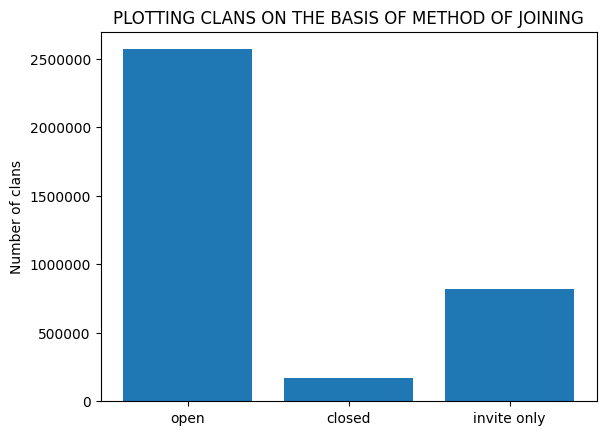

In [9]:
def clan_type():
    open_clans = df['clan_type'].groupby(df['clan_type']).count()['open']
    close_clans = df['clan_type'].groupby(df['clan_type']).count()['closed']
    invite_only_clans = df['clan_type'].groupby(df['clan_type']).count()['inviteOnly']

    height = [open_clans, close_clans, invite_only_clans]
    labels = ['open', 'closed', 'invite only']

    fig, ax = plt.subplots() 
    ax.bar(labels, height)
    ax.set_title('PLOTTING CLANS ON THE BASIS OF METHOD OF JOINING')
    ax.set_ylabel('Number of clans')
    ax.get_yaxis().get_major_formatter().set_scientific(False)
    return plt.show()

clan_type()

#### VISUALIZING THE CLAN LOCATIONS

ANALYZING THE DISTINCT LOCATIONS OF THE CLANS

In [46]:
clan_locations = df['clan_location'].unique()
print(f'Different clan locations are as follows: \n{clan_locations}\n\n')

i = 0
for location in clan_locations:
    i = i+1
print(f'Number of different clan locations = {i}')

Different clan locations are as follows: 
['International' 'Indonesia' 'Pakistan' nan 'Türkiye' 'Bahamas' 'Chile'
 'Brazil' 'Philippines' 'Italy' 'Canada' 'Mexico' 'Malaysia' 'India'
 'Afghanistan' 'United States' 'Iran' 'Germany' 'Uruguay' 'American Samoa'
 'Thailand' 'Vietnam' 'Greenland' 'Latvia' 'South Africa' 'Albania'
 'Japan' 'Hungary' 'Bangladesh' 'Norway' 'France' 'Myanmar (Burma)'
 'Kuwait' 'Australia' 'Bosnia and Herzegovina' 'Ecuador' 'Kazakhstan'
 'North Korea' 'Saudi Arabia' 'New Zealand' 'Jamaica' 'China' 'Hong Kong'
 'Panama' 'United Kingdom' 'Barbados' 'Netherlands' 'Belgium' 'Russia'
 'Fiji' 'Uzbekistan' 'Swaziland' 'Dominican Republic' 'Iraq' 'Portugal'
 'Egypt' 'Israel' 'Western Sahara' 'Ireland' 'Côte d’Ivoire'
 'Heard & McDonald Islands' 'Åland Islands' 'Bolivia' 'Samoa' 'Honduras'
 'French Polynesia' 'Azerbaijan' 'Andorra' 'Algeria' 'Anguilla'
 'Central African Republic' 'Syria' 'El Salvador' 'Poland' 'Ukraine'
 'Cambodia' 'Chad' 'Costa Rica' 'Sri Lanka' 'Zambia'

THERE ARE TOTAL 256 DIFFERENT CLAN LOCATIONS AS PER THE DATASET

LET'S VISUALIZE THE CONCENTRATION OF CLANS FOR EACH LOCATION

In [59]:
clan_location_series = df['clan_location'].groupby(df['clan_location']).count().sort_values(ascending=False)
display(clan_location_series)

clan_location
International       504866
Indonesia           242039
United States       147021
Philippines         102493
India                96483
                     ...  
Tokelau                 59
Saint Barthélemy        58
Saint Helena            56
Sierra Leone            50
Liberia                 47
Name: clan_location, Length: 255, dtype: int64

Only a subset of 25 data values has been plotted from the data SERIES, 

since the data SERIES had a huge number of values, the plotting has been divided into 2 graphs:

1) most concentrated clan locations
 
2) least concentreated clan locations

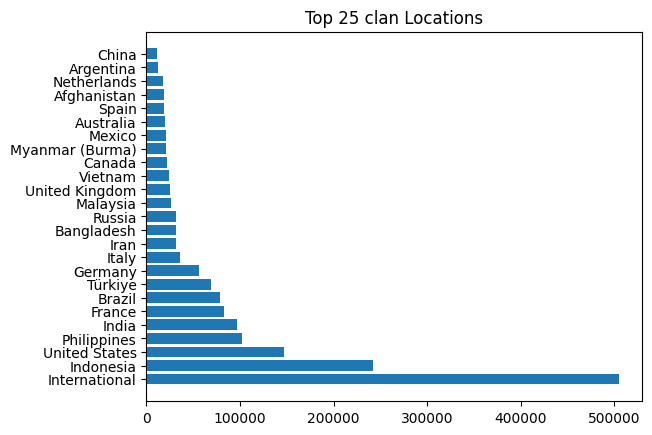

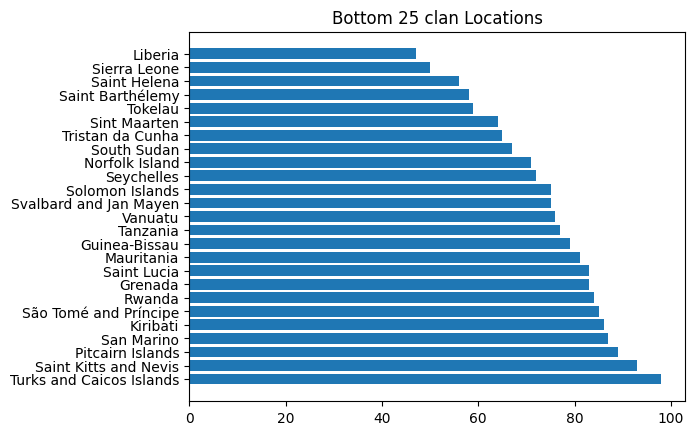

In [79]:
class clan_location_distribution():
    amount_clan = clan_location_series.to_list()
    location = clan_location_series.index.to_list()
    
    def top_25():
        fig, ax = plt.subplots()
        ax.barh(clan_location_distribution.location[:25], clan_location_distribution.amount_clan[:25], align='center')
        ax.set_title('Top 25 clan Locations')
        plt.show()

    def bottom_25():
        fig, ax = plt.subplots()
        ax.barh(clan_location_distribution.location[-25:], clan_location_distribution.amount_clan[-25:], align='center')
        ax.set_title('Bottom 25 clan Locations')
        plt.show()

clan_location_distribution.top_25()
clan_location_distribution.bottom_25()

MOST 'clan_locations' are INTERNATIONAL followed by INDONESIA in the 2nd place 